In [2]:
# 기본 import

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
plt.show()

NameError: name 'knn' is not defined

In [ ]:
plt.imshow(X_test[10].reshape(8,8),cmap=plt.cm.gray_r,interpolation="nearest")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))

In [ ]:
# classification 4종 import

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

In [4]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(1437, 64)
(1437,)


In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

X_train = encoder.fit_transform(X_train).toarray()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

print(X_train.shape)
print(y_train.shape)

(1437, 886)
(1437, 10)


In [6]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(10,activation='softmax'))

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\1563a\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         8,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            70 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,082 (35.48 KB)

 Trainable params: 9,082 (35.48 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 딥러닝 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1578 - loss: 2.1959 - val_accuracy: 0.1597 - val_loss: 2.0736
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2632 - loss: 1.8447 - val_accuracy: 0.4306 - val_loss: 1.6662
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4575 - loss: 1.3483 - val_accuracy: 0.4653 - val_loss: 1.5401
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5340 - loss: 1.2426 - val_accuracy: 0.4792 - val_loss: 1.3777
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5417 - loss: 1.1249 - val_accuracy: 0.5278 - val_loss: 1.3731
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5611 - loss: 1.0868 - val_accuracy: 0.5208 - val_loss: 1.3608
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6021 - loss: 1.0119 - val_accuracy: 0.5000 - val_loss: 1.6113
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 0.9884 - val_accuracy: 0.5139 - val_loss:

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 886, but received input with shape (32, 64)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 64), dtype=float32)
  • training=False
  • mask=None

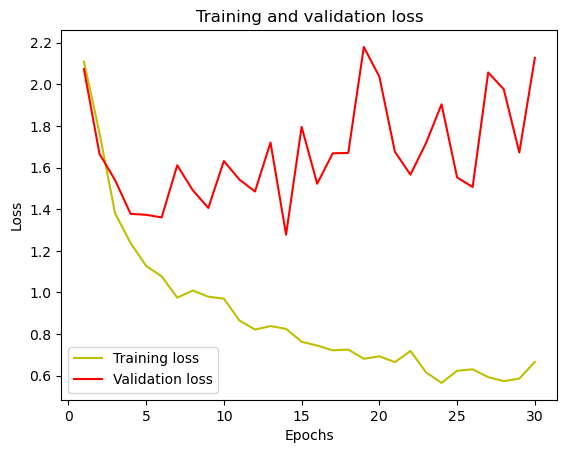

In [8]:
# 딥러닝 결과

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()